# Predicting Course Enrollments Using Historical Data
By Archit Parnami - architparnami@gmail.com

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing

In [5]:
dataFile = "Enrollments_Accumulated.xlsx"
df = pd.read_excel(dataFile, "Sheet1")

lets see what the data looks like

In [6]:
df.head()

,Course,Capacity,Enrolled,Location,Term,Year
0,5122,7,7,1,2,2007
1,5122,25,22,1,2,2008
2,5122,39,36,1,2,2009
3,5122,28,29,1,2,2010
4,5122,31,29,1,2,2011


In [8]:
df.tail()

,Course,Capacity,Enrolled,Location,Term,Year
82,6166,90,42,1,1,2016
83,6166,90,74,1,2,2016
84,6166,94,61,1,1,2017
85,6166,65,42,1,2,2017
86,6166,110,36,1,1,2018


Lets get all the unique courses

In [9]:
courses = df.Course.unique()
print(courses)

[5122 6160 6162 6166]


In [10]:
#columns in use
cols = ['Capacity', 'Enrolled', 'Year']

Now, we will build a model for a course. Right now we will focus on courses offered on campus and in the Fall semester.
Hence Location=1 and Term=2
This is a very simple model based on just two features and uses Linear Regression to make the predictions.

In [17]:
def build_model(course):
    
    data = df[(df.Course==course) & (df.Location==1) & (df.Term==2)][cols]
    df_train = data[data.Year != 2017]
    df_test = data[data.Year == 2017]
    
    Y_train = df_train['Enrolled']
    X_train = df_train[['Capacity', 'Year']]
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    
    Y_test = df_test['Enrolled']
    X_test = df_test[['Capacity', 'Year']]
    X_test_norm = scaler.transform(X_test)
    
                      
    reg = linear_model.LinearRegression()
    poly = preprocessing.PolynomialFeatures(1)
    
    Xi_train = poly.fit_transform(X_train_norm)
    reg.fit(Xi_train, Y_train)
    
    fitting = reg.predict(Xi_train)
    
    Xi_test = poly.fit_transform(X_test_norm)
    pred = reg.predict(Xi_test)
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data['Year'], data['Enrolled'], color='green', label='Training Points')
    ax.plot(X_train['Year'], fitting, color='orange', label='Curve Fitting')
    
    val = Y_test.iloc[0]
    ax.scatter(X_test['Year'], Y_test, color='blue', label='Test Point')
    ax.annotate(' '+ str(val), (2017, val))
    
    val = int(round(pred[0],0))
    ax.scatter(X_test['Year'], pred, color='red', label='Prediction')
    ax.annotate(' '+ str(val), (2017, val))
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Enrollments')
    title = "Fall semester enrollments for ITCS {}".format(course)
    plt.title(title)
    plt.legend()

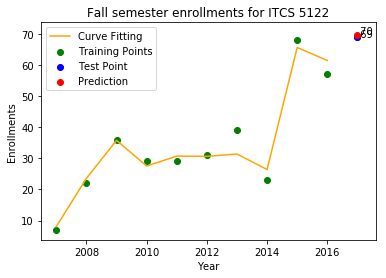

In [18]:
course = 5122
build_model(course)

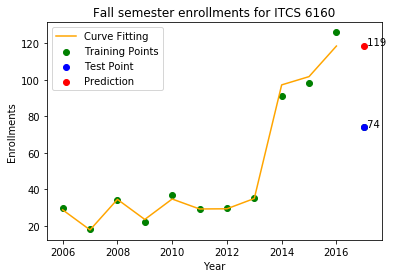

In [19]:
course = 6160
build_model(course)

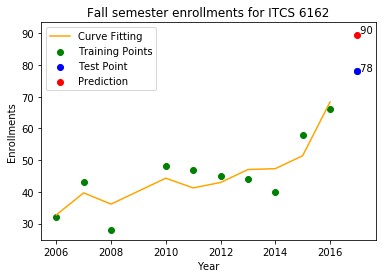

In [20]:
course = 6162
build_model(course)

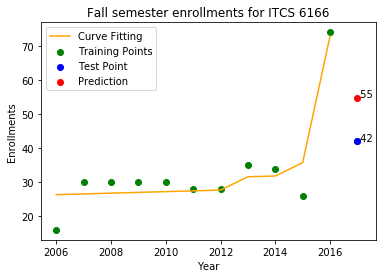

In [21]:
course = 6166
build_model(course)